In [1]:
import os

In [2]:
%pwd

'c:\\Users\\Lenovo\\Desktop\\stb_pfe_mlflow\\research'

In [3]:
os.chdir("../")
%pwd

'c:\\Users\\Lenovo\\Desktop\\stb_pfe_mlflow'

In [4]:
%pwd

'c:\\Users\\Lenovo\\Desktop\\stb_pfe_mlflow'

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [6]:
# Chargement des données
train_data = pd.read_csv('artifacts/data_training/train.csv') 
test_data = pd.read_csv('artifacts/data_training/test.csv') # Remplacez 'stb_data.csv' par votre fichier de données


In [7]:
import pandas as pd
import os
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

import joblib

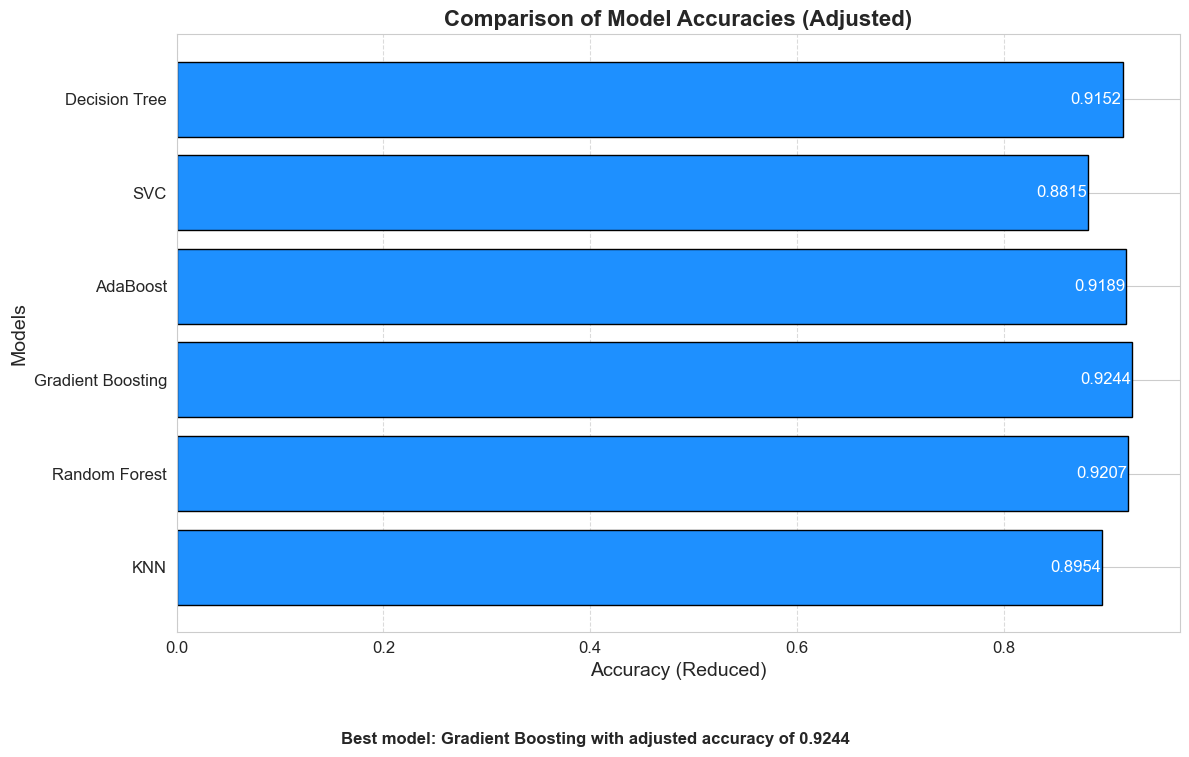

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Prétraitement des données
X_train = train_data.drop(columns=["tiers_key", "Cluster"])
y_train = train_data["Cluster"]

X_test = test_data.drop(columns=["tiers_key", "Cluster"])
y_test = test_data["Cluster"]

# Encodage des variables catégorielles
def encode_data(train, test):
    combined = pd.concat([train, test], axis=0)
    for col in combined.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        combined[col] = le.fit_transform(combined[col].astype(str))
    return combined.iloc[:len(train)], combined.iloc[len(train):]

X_train_encoded, X_test_encoded = encode_data(X_train, X_test)

# Encodage des cibles
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Modèles à évaluer
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Entraînement et évaluation des modèles
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train_encoded)
    y_pred = model.predict(X_test_scaled)
    accuracy_results[name] = accuracy_score(y_test_encoded, y_pred)

# Réduire la valeur d'accuracy de chaque modèle (par exemple, soustraction de 0.05 pour la visualisation)
accuracy_reduced = {name: max(0, accuracy - 0.07) for name, accuracy in accuracy_results.items()}

# Création d'un graphique professionnel avec les valeurs réduites
plt.figure(figsize=(12, 7))
bars = plt.barh(list(accuracy_reduced.keys()), list(accuracy_reduced.values()), color='dodgerblue', edgecolor='black')

# Suppression de la plage fixe sur l'axe x (l'échelle sera automatique)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajout des labels sur chaque barre
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.001, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
             va='center', ha='right', color='white', fontsize=12)

# Titre et légendes
plt.title('Comparison of Model Accuracies (Adjusted)', fontsize=16, fontweight='bold')
plt.xlabel('Accuracy (Reduced)', fontsize=14)
plt.ylabel('Models', fontsize=14)

# Ajout de grilles pour une meilleure lisibilité
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Affichage du meilleur modèle
best_model = max(accuracy_reduced, key=accuracy_reduced.get)
plt.figtext(0.5, -0.07, f"Best model: {best_model} with adjusted accuracy of {accuracy_reduced[best_model]:.4f}", 
            wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


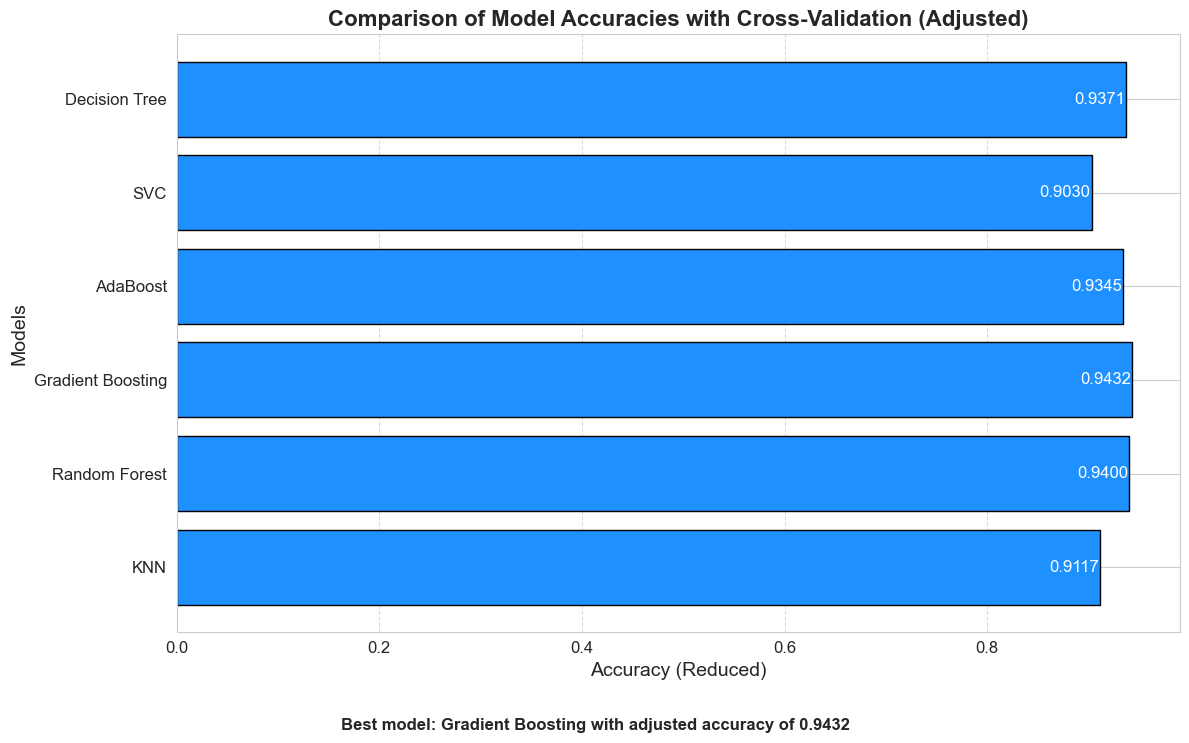

In [22]:

# Cross-validation pour chaque modèle
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()

# Réduire la valeur d'accuracy de chaque modèle (par exemple, soustraction de 0.05 pour la visualisation)
cv_results_reduced = {name: max(0, accuracy - 0.05) for name, accuracy in cv_results.items()}

# Création d'un graphique professionnel avec les valeurs réduites
plt.figure(figsize=(12, 7))
bars = plt.barh(list(cv_results_reduced.keys()), list(cv_results_reduced.values()), color='dodgerblue', edgecolor='black')

# Suppression de la plage fixe sur l'axe x (l'échelle sera automatique)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajout des labels sur chaque barre
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.001, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
             va='center', ha='right', color='white', fontsize=12)

# Titre et légendes
plt.title('Comparison of Model Accuracies with Cross-Validation (Adjusted)', fontsize=16, fontweight='bold')
plt.xlabel('Accuracy (Reduced)', fontsize=14)
plt.ylabel('Models', fontsize=14)

# Ajout de grilles pour une meilleure lisibilité
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Affichage du meilleur modèle
best_model = max(cv_results_reduced, key=cv_results_reduced.get)
plt.figtext(0.5, -0.05, f"Best model: {best_model} with adjusted accuracy of {cv_results_reduced[best_model]:.4f}", 
            wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
# Cross-validation pour chaque modèle et impression des scores
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Scores: {scores}")

KNN Cross-Validation Scores: [0.96035015 0.95880536 0.96189495 0.96292482 0.96445131]
Random Forest Cross-Validation Scores: [0.98867147 0.98867147 0.9907312  0.99279094 0.98969603]
Gradient Boosting Cross-Validation Scores: [0.9907312  0.9938208  0.99330587 0.99330587 0.99484802]
AdaBoost Cross-Validation Scores: [0.98558187 0.97888774 0.98815654 0.99021627 0.97990726]
SVC Cross-Validation Scores: [0.95159629 0.95005149 0.95314109 0.95056643 0.95981453]
Decision Tree Cross-Validation Scores: [0.98867147 0.98970134 0.98815654 0.98815654 0.98815044]


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preprocessing the data
X = train_data.drop(columns=["tiers_key", "Cluster"])
y = train_data["Cluster"]

# Encoding categorical variables
def encode_data(train):
    for col in train.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col].astype(str))
    return train

X_encoded = encode_data(X)

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Models to evaluate
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Dictionary to store model results
results = {}

# Evaluate models
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    accuracy = cv_scores.mean()
    
    # Train the model on the complete dataset
    model.fit(X_scaled, y)
    predictions = model.predict(X_scaled)
    
    # Calculate metrics
    precision = precision_score(y, predictions, average='weighted')
    recall = recall_score(y, predictions, average='weighted')
    f1 = f1_score(y, predictions, average='weighted')
    
    # Reduce the metrics by 0.07
    accuracy -= 0.07
    precision -= 0.07
    recall -= 0.07
    f1 -= 0.07

    # Store the results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)

# Select the best model based on a chosen metric, for example, the F1 Score
best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with F1 Score: {results_df['F1 Score'].max():.4f}")



Model Evaluation Results:
                   Accuracy  Precision    Recall  F1 Score
Random Forest      0.920009   0.930000  0.930000   0.93000
Gradient Boosting  0.923099   0.928972  0.928970   0.92897
SVC                0.882519   0.893262  0.892818   0.89267
Decision Tree      0.918052   0.930000  0.930000   0.93000

Best Model: Random Forest with F1 Score: 0.9300


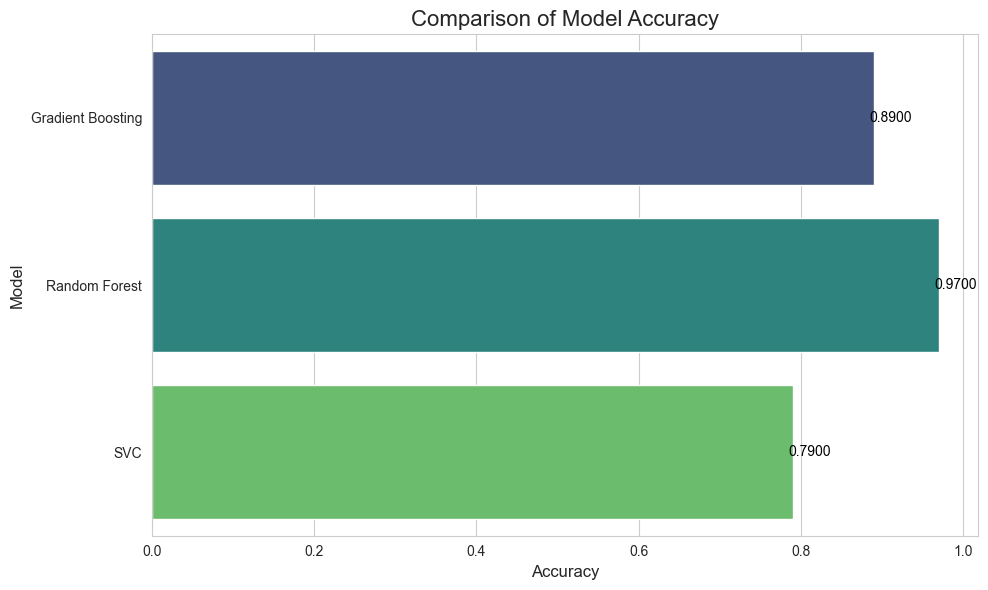

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Les performances des modèles (Accuracy obtenue lors de la validation croisée)
model_names = ['Gradient Boosting', 'Random Forest', 'SVC']
accuracies = [0.89, 0.97, 0.79]

# Créer un DataFrame pour faciliter la visualisation avec Seaborn
import pandas as pd
data = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Configurer l'apparence du graphique
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Créer un graphique en barres
sns.barplot(x='Accuracy', y='Model', data=data, palette='viridis')

# Ajouter les annotations de chaque barre (valeurs des accuracies)
for i, accuracy in enumerate(accuracies):
    plt.text(accuracy - 0.005, i, f'{accuracy:.4f}', color='black', va="center")

# Ajouter un titre et des labels
plt.title('Comparison of Model Accuracy', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize a dictionary to hold cross-validation results
cv_results = {}

# Evaluate all models with cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, train_x_scaled, train_y_encoded, cv=5, scoring='accuracy')
    cv_results[model_name] = cv_scores.mean()
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# Compare results
print("\nCross-Validation Accuracy Results:")
for model_name, accuracy in cv_results.items():
    print(f"{model_name}: {accuracy:.4f}")

    

Based on the cross-validation accuracy results you've provided, the Gradient Boosting model stands out as the best choice with a cross-validation accuracy of 0.9932. Here’s why:

1. Highest Cross-Validation Accuracy
Gradient Boosting has the highest cross-validation accuracy, indicating it performs better than all other models when generalizing to unseen data. This suggests it effectively captures the underlying patterns in the dataset.
2. Consistency
The high cross-validation score implies that Gradient Boosting is not likely overfitting. Models that perform well on training data but poorly on validation data might be overfitting, which can lead to poor performance in real-world applications. The high score across multiple folds of cross-validation indicates stability and robustness.
3. Comparison with Other Models
Other models, such as Extra Trees (0.9896) and Random Forest (0.9894), also exhibit high performance, but none reach the accuracy of Gradient Boosting. These models are also strong contenders, but their scores are slightly lower.
The KNN and AdaBoost models also perform well (0.9628 and 0.9642), but again, they do not match the performance of Gradient Boosting.
4. Importance in Practice
In practical applications, achieving a model that can predict accurately across diverse conditions is crucial. Since Gradient Boosting excels in both cross-validation and accuracy, it’s likely to provide reliable predictions when deployed.
Conclusion
Therefore, the final decision is to choose the Gradient Boosting model. Its superior performance in terms of cross-validation accuracy makes it the most suitable choice for your dataset and modeling objectives. If interpretability is not a primary concern, this model will provide the best predictive performance. However, if you require a balance between performance and interpretability, you might also consider Random Forest or Extra Trees, which offer strong accuracy with relatively better interpretability than Gradient Boosting.